어떤 종류의 사람들이 많이 살아남았는지에 대한 분석 하고
그리고 머신러닝을 이용해 어떤 승객이 생존했을지 예측하는 것이 목표

# 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/study/Dacon/타이타닉/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/study/Dacon/타이타닉/test.csv')

# 데이터 확인

* PassengerID : 탑승객 고유 아이디
* Survival : 탑승객 생존 유무 (0: 사망, 1: 생존)
* Pclass : 등실의 등급
* Name : 이름
* Sex : 성별
* Age : 나이
* Sibsp : 함께 탑승한 형제자매, 아내, 남편의 수
* Parch : 함께 탑승한 부모, 자식의 수
* Ticket :티켓 번호
* Fare : 티켓의 요금
* Cabin : 객실번호
* Embarked : 배에 탑승한 항구 이름 ( C = Cherbourn, Q = Queenstown, S = Southampton)

In [3]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train_df.shape

(891, 12)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 결측치 확인

In [7]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train_df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

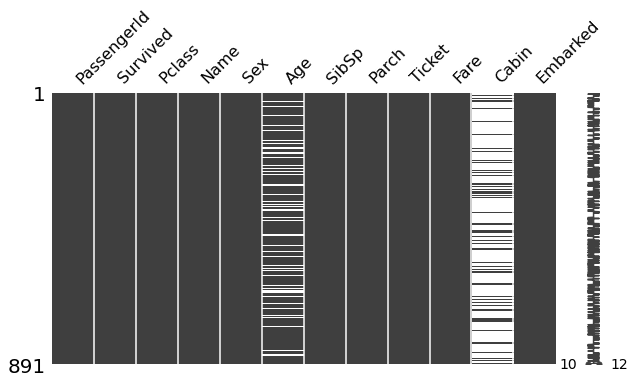

In [9]:
import missingno as msno

msno.matrix(train_df, figsize=(10,5))

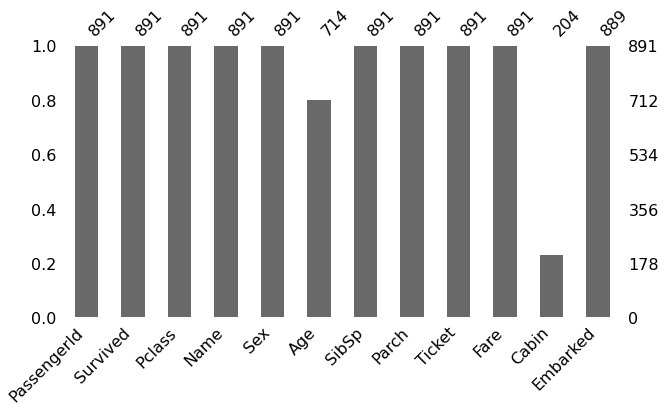

In [10]:
msno.bar(train_df, figsize=(10,5))

- Age 칼럼은 생존 여부 예측에 있어서 중요할 것 같아 보이므로 대체하는 방법을 사용할 예정이다.
- Cabin 칼럼은 결측치의 비율이 너무 많다. 데이터가 부족하다는 사실 자체가 모델 예측에 있어 신호가 될 수 도 있다. Cabin 칼럼을 삭제하거나 결측치라는 것을 나타내는 별도의 컬럼을 생성하는 방법을 사용해볼만 하다.
- Embarked 칼럼은 결측치가 2개 밖에 없으므로 대체가 가능할 것 같다.

# 기초 통계량 분석 및 EDA

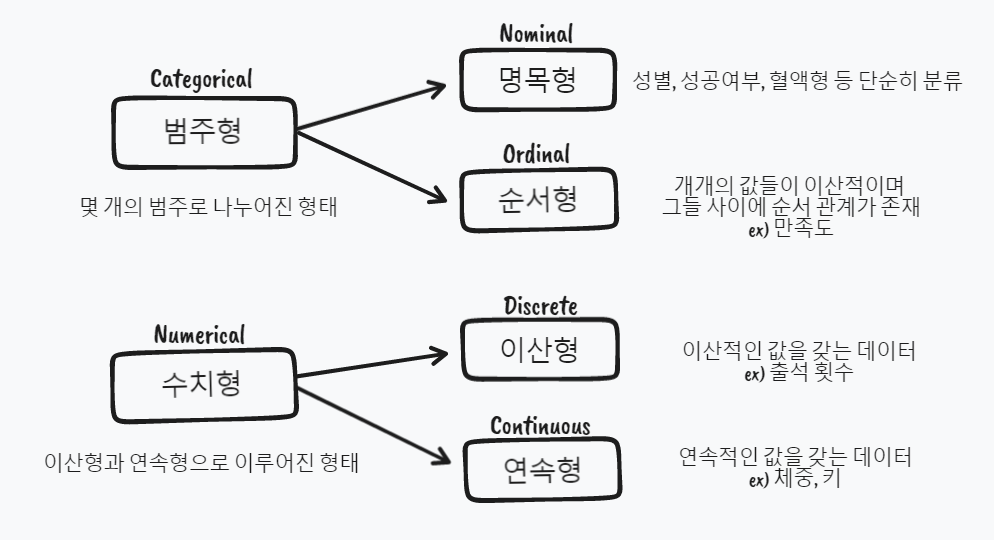

## 수치형 데이터 파악

In [11]:
#dypes에 따른 수치형 칼럼 명 
num_columns_temp = train_df.dtypes[train_df.dtypes != 'object'].index.tolist()
print(num_columns_temp)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


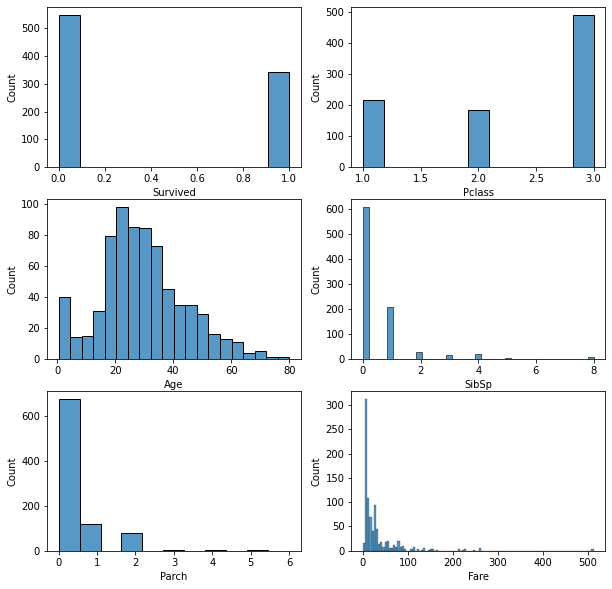

In [12]:
fig, axes = plt.subplots(3,2, figsize=(10,10))
sns.histplot(x='Survived', data=train_df, ax=axes[0,0])
sns.histplot(x='Pclass', data=train_df, ax=axes[0,1])
sns.histplot(x='Age', data=train_df, ax=axes[1,0])
sns.histplot(x='SibSp', data=train_df, ax=axes[1,1])
sns.histplot(x='Parch', data=train_df, ax=axes[2,0])
sns.histplot(x='Fare', data=train_df, ax=axes[2,1])
plt.show()

* Pclass는 범주형(Ordinal)
* Fare는 범위가 넓어서 rugplot으로 확인(이상치를 확인하려고 할 떄 많이 사용함)


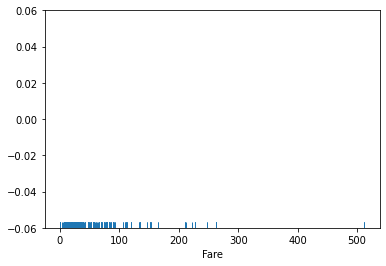

In [13]:
sns.rugplot(x='Fare', data=train_df)

In [14]:
train_df[train_df['Fare'] > 500]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


이상치까지는 아니고 그냥 비싼 요금일 것 같다.

In [15]:
# 사용할 최종 수치형 칼럼
num_columns = [ 'Age', 'SibSp', 'Parch', 'Fare']

### 생존여부와 수치형 데이터 비교 분석

나이 - 생존여부

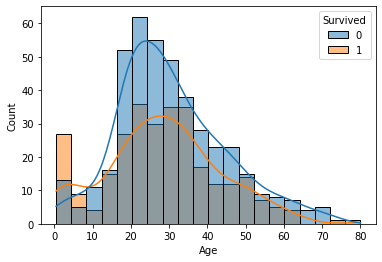

In [16]:
sns.histplot(x='Age', hue='Survived', data=train_df, kde=True)

`영유아일 때 생존 확률이 높다`

형제 자매 수 - 생존 여부

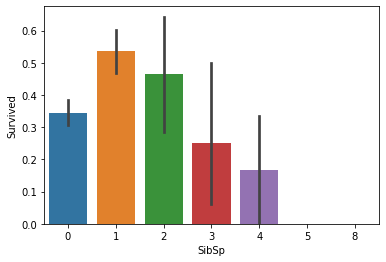

In [17]:
sns.barplot(x='SibSp', y='Survived', data = train_df)
plt.show()

`형제 자매가 없을 때 보다 1,2명 있을 때 생존확률이 좀 더 높다`

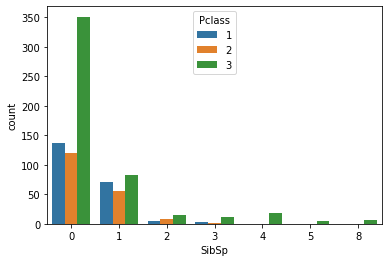

In [18]:
sns.countplot(x='SibSp', hue='Pclass',data=train_df)
plt.show()

`형제 자매가 많아질 수록 Pclass = 3 인것으로 보임`

함께 탑승한 자식/부모 수 - 생존 여부

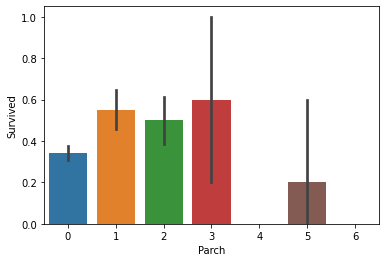

In [19]:
sns.barplot(x='Parch', y='Survived', data=train_df)
plt.show()

In [20]:
train_df[train_df['Parch'] == 4]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",female,45.0,1,4,347088,27.900,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",male,40.0,1,4,347088,27.900,NaN,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000,C23 C25 C27,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S


부모/자식 수가 4명인 경우 생존확률이 0%라서 데이터를 확인해보니 Parch가 4인 경우의 데이터 수는 4개밖에 없었음

요금 - 생존여부

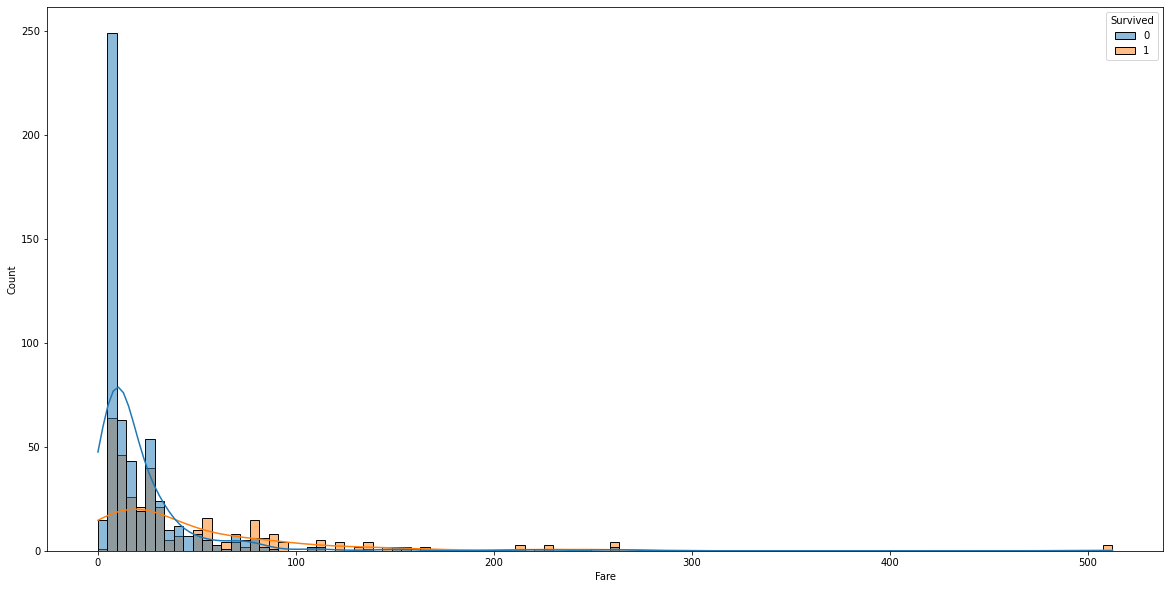

In [21]:
plt.figure(figsize=(20,10))
sns.histplot(x='Fare', hue='Survived', data=train_df, kde=True)
plt.show()

요금이 높을 수록 생존확률이 좀 더 높은 추세

In [22]:
train_df[['Fare', 'Survived']].groupby(['Survived']).mean()

,Fare
Survived,
0,22.117887
1,48.395408


## 범주형 데이터 파악

In [23]:
# data type이 object형
temp_cat_columns = train_df.dtypes[train_df.dtypes == 'object'].index.tolist()
print(temp_cat_columns)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


* Name

In [24]:
train_df['Name'].value_counts()

Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64

범주형 데이터라기보다 그냥 텍스트 데이터<br>
`Mr, Miss 같은 단어를 가지고 Age의 결측치를 대체할 수 있을 것 같긴 해보임`

* Sex

In [25]:
train_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

* Ticket

In [26]:
train_df['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

이것도 범주형으로 보기에는 681개로 너무 많음

* Embarked

In [27]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

### 범주형 데이터와 생존 여부 비교

In [28]:
cat_columns = ['Pclass', 'Sex', 'Embarked']

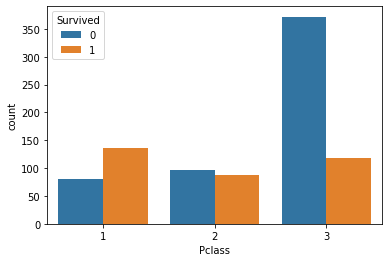

In [29]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.show()

In [30]:
train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


`Pclass가 3일 때 생존확률이 매우 낮다`

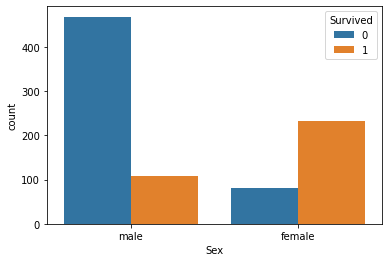

In [31]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.show()

In [32]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


`여자의 생존 확률이 훨씬 높음`

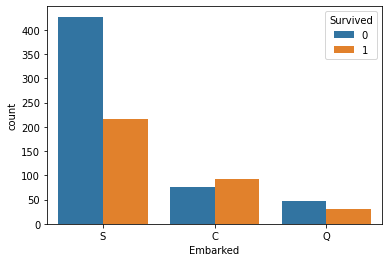

In [33]:
sns.countplot(x='Embarked', hue='Survived', data=train_df)
plt.show()

In [34]:
train_df[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


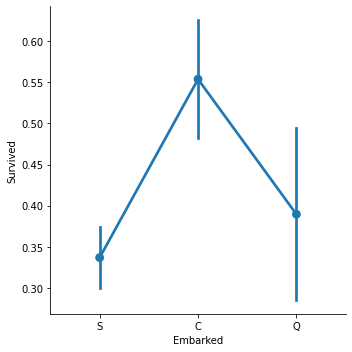

In [35]:
sns.catplot(x='Embarked',y='Survived',data=train_df, kind='point')
plt.show()

C에서 승선했을 때 생존확률이 높다. 왜 높은 것인지 다른 칼럼들이랑도 비교해서 확인해봐야할 듯

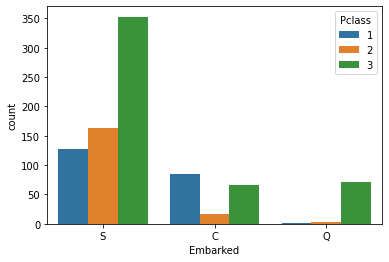

In [36]:
# C에서 승선한 경우가 PClass가 높은 걸까?
sns.countplot(x='Embarked', hue='Pclass', data=train_df)

In [37]:
train_df[['Pclass', 'Embarked']].groupby('Embarked').mean()

,Pclass
Embarked,
C,1.886905
Q,2.909091
S,2.350932


C에서 승선한 사람들의 Pclass가 다른 곳에서 승선한 사람보다 높은 편이다.

지금까지 살펴본 결과를 정리해보면<br>
Pclass(등실 등급)이 높을수록,요금이 비쌀 수록,C에서 승선했을 경우,혼자보다는 가족과 탑승했을 경우, 남성보다는 여성일수록, 영유아 일수록 생존확률이 높다.

요금이 비쌀 수록 -> Pclass 등급이 높은편/ C에서 승선했을 확률이 높은 편 <br>
모델로 학습할 떄 다중공선성 문제가 나타날 것 같음

# 데이터 전처리

전처리 과정은 test_df에도 필요하므로 리팩토링

## 결측치 처리

* cabin은 결측치가 70%이므로 불필요한 칼럼을 drop할 떄 넣어서 삭제

* age는 Name 칼럼을 이용해 대체 가능해 보임

In [38]:
train_df['Initial']= train_df.Name.str.extract('([A-Za-z]+)\.')

In [39]:
pd.crosstab(train_df.Initial,train_df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [40]:
train_df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

pd.crosstab(train_df.Initial,train_df.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Master,Miss,Mr,Mrs,Other
Sex,,,,,
female,0,186,1,127,0
male,40,0,528,0,9


In [41]:
train_df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

Master는 4살, Miss는 21세, Mr는 32세, Mrs는 35세, Other은 45세로 대체

In [42]:
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial == 'Master'), 'Age'] = 4
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial == 'Miss'), 'Age'] = 21
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial == 'Mr'), 'Age'] = 32
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial == 'Mrs'), 'Age'] = 35
train_df.loc[(train_df.Age.isnull()) & (train_df.Initial == 'Other'), 'Age'] = 45

In [43]:
train_df['Age'].isnull().sum()

0

* Embarked의 결측치 2개 확인

In [44]:
train_df.loc[train_df['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


Embarked는 다른 데이터를 보고 논리적으로 예측할 수는 없으므로 그냥 최빈값으로 대체

In [45]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [46]:
train_df['Embarked'].fillna('S', inplace=True)

In [47]:
train_df['Embarked'].isnull().sum()

0

## 불필요한 칼럼 drop

컬럼 간 corr을 확인하기 위해서는 범주형 변수를 수치형태로 변환해줘야한다.

### 범주형 변수 더미변수화

In [48]:
X_cat = train_df[['Sex', 'Embarked']]
X_cat = pd.get_dummies(X_cat, drop_first=True) 
# drop_first는 첫번째 카테고리 값은 사용하지 않는다는 뜻이다. 왜냐하면 Sex_male = 0이면 Sex_female이니까
X_cat = pd.concat([X_cat, train_df['Pclass']], axis=1)

In [49]:
X_cat.head()

,Sex_male,Embarked_Q,Embarked_S,Pclass
0,1,0,1,3
1,0,0,0,1
2,0,0,1,3
3,0,0,1,1
4,1,0,1,3


In [50]:
num_columns

['Age', 'SibSp', 'Parch', 'Fare']

In [51]:
X_num = train_df[['Age', 'SibSp', 'Parch', 'Fare']]
X = pd.concat([X_num, X_cat], axis=1)

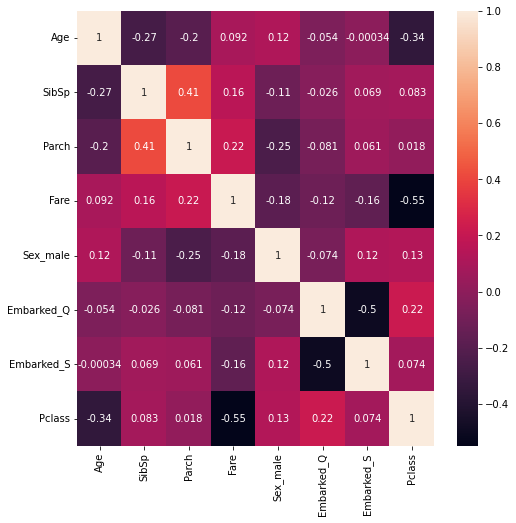

In [52]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(X.corr(), annot=True)

SibSp와 Parch는 서로 다중공선성이 높다. 그냥 탑승 동행자 존재 여부 컬럼을 새로 만들면 좋을 것 같다.

In [53]:
train_df['BoardAlone'] = np.where((train_df['SibSp']+train_df['Parch']) >0, 0, 1)

In [54]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,BoardAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1


Pclass와 Fare도 서로 다중공선성이 높다. 방 등급이 높을수록 요금이 비싸지는 것은 당연하기 때문이다. 둘 중 한 칼럼은 드랍해도 될 듯

## 불필요한 칼럼 삭제

In [55]:
train_df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Initial'],axis=1,inplace=True)

In [57]:
train_df.head(3)

,Survived,Pclass,Sex,Age,Embarked,BoardAlone
0,0,3,male,22.0,S,0
1,1,1,female,38.0,C,0
2,1,3,female,26.0,S,1


## 수치형 데이터 표준화 

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
X_num = train_df[['Age']]
X_cat = train_df[['Pclass','Sex','Embarked','BoardAlone']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = train_df['Survived']

## 리팩토링

In [62]:
### 전처리 함수###

def preprocess(df):
  # age 결측치 대체
  df['Initial']= df.Name.str.extract('([A-Za-z]+)\.')
  df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)
  df.loc[(df.Age.isnull()) & (df.Initial == 'Master'), 'Age'] = 4
  df.loc[(df.Age.isnull()) & (df.Initial == 'Miss'), 'Age'] = 21
  df.loc[(df.Age.isnull()) & (df.Initial == 'Mr'), 'Age'] = 32
  df.loc[(df.Age.isnull()) & (df.Initial == 'Mrs'), 'Age'] = 35
  df.loc[(df.Age.isnull()) & (df.Initial == 'Other'), 'Age'] = 45

  # Embarked 결측치 대체
  df['Embarked'].fillna('S', inplace=True)

  # 탑승 동행 여부 칼럼 생성
  df['BoardAlone'] = np.where((df['SibSp']+df['Parch']) >0, 0, 1)

  # 불필요한 칼럼 삭제
  df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Fare','Cabin','Initial'],axis=1,inplace=True)
  
  return df

In [63]:
### train, valid 데이터 셋 반환 함수###

def train_valid_X_y(df):
  from sklearn.preprocessing import StandardScaler
  X_cat = df[['Sex', 'Embarked']]
  X_cat = pd.get_dummies(X_cat, drop_first=True) 
  X_cat = pd.concat([X_cat, train_df['Pclass']], axis=1)

  X_num = df[['Age']]
  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X_num)
  X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

  X = pd.concat([X_scaled, X_cat], axis=1)
  y = df['Survived']

  from sklearn.model_selection import train_test_split
  X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

  return X_train, X_valid, y_train, y_valid

In [112]:
### test 데이터 셋 용 전처리 함수2 ###

def test_preprocess2(train_df, test_df):
  from sklearn.preprocessing import StandardScaler

  X_train_num = train_df[['Age']]
  X_test_num = test_df[['Age']]

  scaler = StandardScaler()
  scaler.fit(X_train_num)
  X_scaled = scaler.transform(X_test_num)
  X_scaled = pd.DataFrame(X_scaled, index=X_test_num.index, columns=X_test_num.columns)

  X_cat = test_df[['Sex', 'Embarked']]
  X_cat = pd.get_dummies(X_cat, drop_first=True) 
  X_cat = pd.concat([X_cat, test_df['Pclass']], axis=1)

  X_test = pd.concat([X_scaled, X_cat], axis=1)
  return X_test

---------------------------------------------------------

In [125]:
train_df = pd.read_csv('/content/drive/MyDrive/study/Dacon/타이타닉/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/study/Dacon/타이타닉/test.csv')

In [118]:
train = preprocess(train_df)
X_train, X_valid, y_train, y_valid = train_valid_X_y(train)

In [119]:
test = preprocess(test_df)
X_test = test_preprocess2(train_df, test)

# 모델 학습 및 평가

In [94]:
!pip install xgboost

In [95]:
!pip install lightgbm

In [105]:
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [106]:
for model in [LogisticRegression,
              DecisionTreeClassifier,
              KNeighborsClassifier,
              GaussianNB,
              SVC,
              RandomForestClassifier,
              XGBClassifier,
              LGBMClassifier,
              ]:
  cls = model()
  cls.fit(X_train, y_train)
  pred = cls.predict(X_valid)
  auc = roc_auc_score(y_valid, pred)
  print(f"{model.__name__:22} AUC: ", f"{auc}")

LogisticRegression     AUC:  0.7759757043163609
DecisionTreeClassifier AUC:  0.7490307573016283
KNeighborsClassifier   AUC:  0.744766089428793
GaussianNB             AUC:  0.7592401137244766
SVC                    AUC:  0.7268027914189713
RandomForestClassifier AUC:  0.7507107779788059
XGBClassifier          AUC:  0.7520677177565263
LGBMClassifier         AUC:  0.7700310157663478


# 테스트 셋 예측

In [121]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

pred = lr.predict(X_test)

# 제출용 csv 파일 생성

In [144]:
final = test_df['PassengerId']

In [145]:
answer = pd.DataFrame({'Survived':pred})

In [146]:
final = pd.concat([final, answer], axis=1)

In [147]:
final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [149]:
final.to_csv("/content/drive/MyDrive/study/Dacon/타이타닉/0204.csv", index=False)